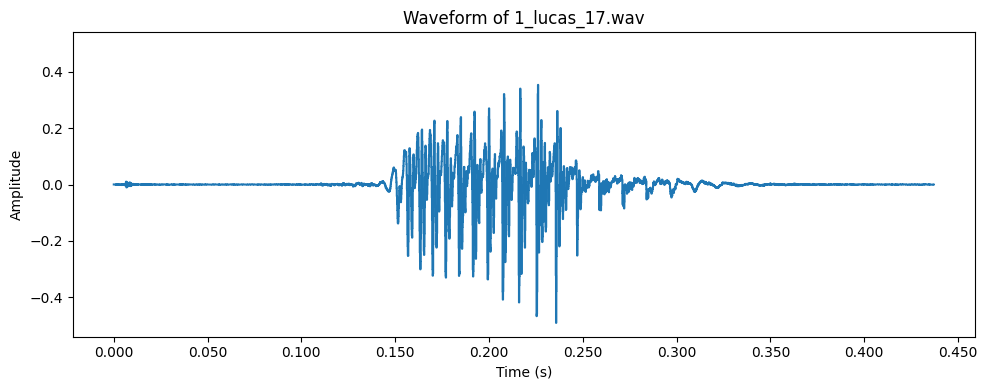

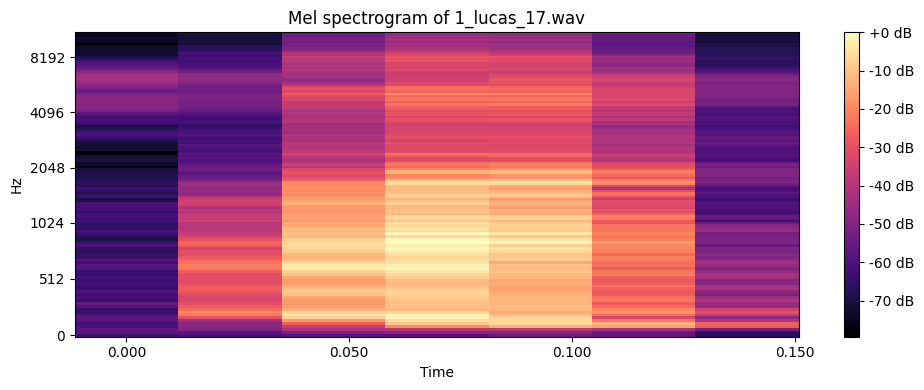

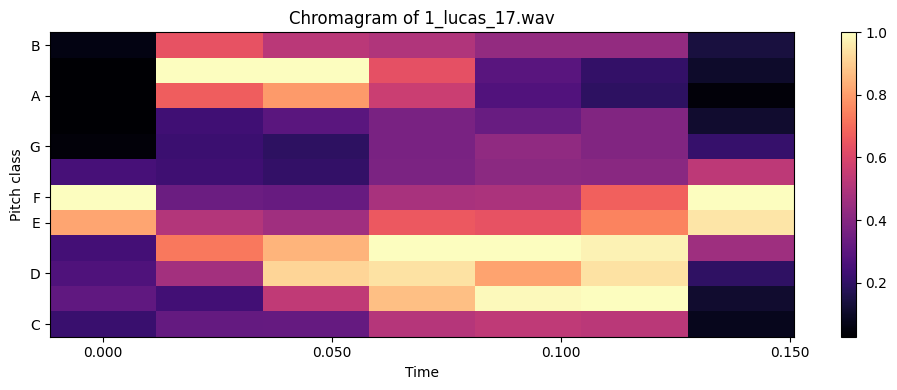

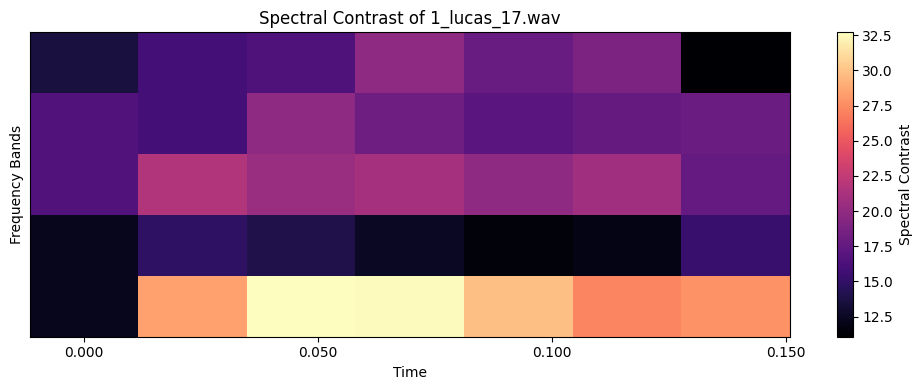

In [9]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the dataset
dataset_path = 'data'

# List all files in the dataset directory
files = [f for f in os.listdir(dataset_path) if f.endswith('.wav')]

# Load an audio file as an example
file_path = os.path.join(dataset_path, files[0])
y, sr = librosa.load(file_path, sr=None)

# Display the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(f'Waveform of {files[0]}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Display the mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Mel spectrogram of {files[0]}')
plt.tight_layout()
plt.show()

# 1. Chromagram visualization
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title(f'Chromagram of {files[0]}')
plt.tight_layout()
plt.show()

# Spectral Contrast visualization with adjusted parameters
spec_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, n_bands=4, fmin=400.0)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spec_contrast, x_axis='time')
plt.colorbar(label='Spectral Contrast')
plt.ylabel('Frequency Bands')
plt.title(f'Spectral Contrast of {files[0]}')
plt.tight_layout()
plt.show()




In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Extract features and labels from the dataset
features = []
labels = []

for file in files:
    y, sr = librosa.load(os.path.join(dataset_path, file), sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    features.append(np.mean(mfccs, axis=1))
    labels.append(int(file[0]))  # Assuming filename starts with the spoken digit

# Convert lists to arrays
X = np.array(features)
y = np.array(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1931
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1650
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1705
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1945
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1720
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1890
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py

Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        61
           1       0.95      1.00      0.97        55
           2       0.92      0.92      0.92        66
           3       0.84      0.90      0.87        60
           4       0.91      0.97      0.94        31
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       1.00      1.00      1.00         1
           8       1.00      0.40      0.57         5
           9       0.00      0.00      0.00         3

    accuracy                           0.90       289
   macro avg       0.65      0.61      0.62       289
weighted avg       0.87      0.90      0.88       289



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
